In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
data_dir = './COVID-19_Radiography_Dataset/COVID/'  


data_transforms = transforms.Compose([
    transforms.Resize(224),   
    transforms.ToTensor(),   
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

image_dataset = datasets.ImageFolder(data_dir, transform=data_transforms)


train_set, test_set = train_test_split(image_dataset, test_size=0.2, random_state=42)


train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
class CovidNet(nn.Module):
    def __init__(self):
        super(CovidNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 56 * 56, 128)  
        self.fc2 = nn.Linear(128, 3)  

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = CovidNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
model.to(device) 

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 15  
losses=[]
for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


Epoch 1, Loss: 0.0
Epoch 2, Loss: 0.0
Epoch 3, Loss: 2.4604246391390916e-06
Epoch 4, Loss: 0.0
Epoch 5, Loss: 0.0
Epoch 6, Loss: 0.0
Epoch 7, Loss: 0.00032645638566464186
Epoch 8, Loss: 0.0
Epoch 9, Loss: 0.0
Epoch 10, Loss: 0.0
Epoch 11, Loss: 0.0
Epoch 12, Loss: 1.4781925017359754e-07
Epoch 13, Loss: 0.0
Epoch 14, Loss: 0.0
Epoch 15, Loss: 0.0


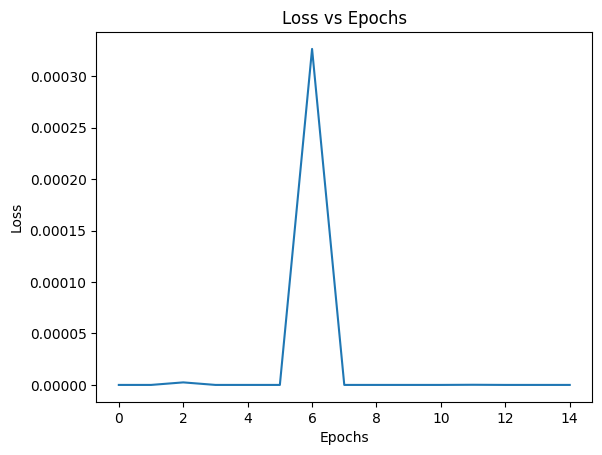

In [2]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

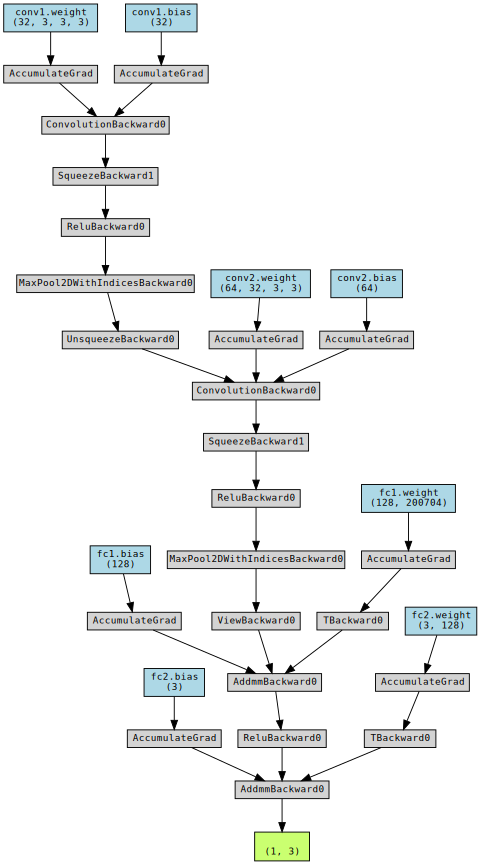

In [3]:
from torchviz import make_dot

make_dot(model(images[0].to(device)), params=dict(model.named_parameters()))